# load libraries


In [5]:
import pandas as pd # Used for data manipulation and analysis
import matplotlib.pyplot as plt # Used for data visualization
import seaborn as sns # Used for enhanced data visualization
import os
import warnings
warnings.filterwarnings('ignore')

In [4]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


 ## 1. Load and Prepare Data

In [10]:
import os
import pandas as pd

# Define the file path
file_path = '/content/drive/MyDrive/Office_Analyst_works/Datasets/Buyer_PO_Summary(20-25).csv'

# Check if the file exists
if os.path.exists(file_path):
    try:
        # Try reading the file with alternative encoding
        df = pd.read_csv(file_path, encoding='ISO-8859-1')  # or try encoding='latin1'
        print("Data loaded successfully.")
    except pd.errors.EmptyDataError:
        print("The data file is empty. Please check the file.")
        data = pd.DataFrame()
    except pd.errors.ParserError:
        print("Error parsing the data file. Please check the file format.")
        df = pd.DataFrame()
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
        data = pd.DataFrame()
else:
    # Write example data to file if it doesn't exist
    df = pd.DataFrame({'col1': [1, 2], 'col2': [3, 4]})
    try:
        df.to_csv(file_path, index=False)
        print(f"File '{file_path}' created successfully.")
    except Exception as e:
        print(f"Error creating the file: {e}")


Data loaded successfully.


In [11]:
df.head()

,Merchant,Buyer,SC/LC No,Season,Order No,Style,Style Description,Destination,Color,Size,TOD,Quantity,FOB,Value
0,Rehan,Mohammadi,NaN,NaN,MG Style for gift,MG Style,Gift,BANGLADESH,NaN,NaN,30-Jul-2021,1,0.01,0.01
1,Rehan,Mohammadi,NaN,NaN,MG Style for gift,MG SAMPLE,NaN,BANGLADESH,NaN,NaN,31-Aug-2021,1,0.01,0.01
2,Mahbub,NEXT,MGNSL/VOGUE SOURCING/06,NaN,7100010476,N59815,NaN,Manchester,NAVY STRIPE,26,07-Jan-2023,60,8.67,520.20
3,Mahbub,NEXT,DC RMR470325,NaN,7100010476,N59815,NaN,Manchester,NAVY STRIPE,26,07-Jan-2023,60,8.67,520.20
4,Mahbub,NEXT,MGNSL/VOGUE SOURCING/06,NaN,7100010476,N59815,NaN,Manchester,NAVY STRIPE,22,07-Jan-2023,129,8.67,"1,118.43"


In [13]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153359 entries, 0 to 153358
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Merchant           153359 non-null  object 
 1   Buyer              153359 non-null  object 
 2   SC/LC No           153295 non-null  object 
 3   Season             142846 non-null  object 
 4   Order No           153359 non-null  object 
 5   Style              153359 non-null  object 
 6   Style Description  121327 non-null  object 
 7   Destination        153291 non-null  object 
 8   Color              151966 non-null  object 
 9   Size               152268 non-null  object 
 10  TOD                153359 non-null  object 
 11  Quantity           153359 non-null  object 
 12  FOB                153359 non-null  float64
 13  Value              153359 non-null  object 
dtypes: float64(1), object(13)
memory usage: 16.4+ MB


None

In [15]:
display(df.describe())

,FOB
count,153359.000000
mean,4.280498
std,2.002853
min,0.010000
25%,2.970000
50%,4.270000
75%,4.950000
max,30.170000


In [16]:
df.sample(10)

,Merchant,Buyer,SC/LC No,Season,Order No,Style,Style Description,Destination,Color,Size,TOD,Quantity,FOB,Value
113733,Shohel,H&M,MGSL/H&M Kids DBBL-S.0,0-2024,994095-7657,1209140,BOYS 100% BCI COTTON WOVEN SHIRT,AU (PM-AU),Blue Medium,2 (92)*,09-Sep-2024,36,2.78,100.08
120709,Fakrul,H&M,MGSL/H&M-Mens DBL-S.0,1-2025,992940-8617,1242812,Shirt - Garment Upper body,MX (PM-MX),Blue Light,XCH (XS)*,30-Sep-2024,174,3.08,535.92
124232,Fakrul,H&M,MGSL/H&M-Mens DBL-S.0,0-2024,977817-8757,1245795,Garment set - Upper body - Garment Upper body,OO (OL-AU),White Light,10 (140)*,14-Oct-2024,2,3.75,7.50
86884,Shohel,H&M,MGSL/H&M Boys S9,0-2024,921246-7657,1209140,BOYS 100% BCI COTTON WOVEN SHIRT,SW (OLSCA),Beige Dark,122 (122)*,03-Jun-2024,86,2.64,227.04
20530,Fakrul,H&M,MGSL/H&M-MENS-S.09,9-2024,686737-8617,0976709,"65% Recycled post-consumer Polyester, 35%Cotto...",US (PM-US),Black Dark,M (M)*,18-Sep-2023,"4,542",3.06,"13,898.52"
20322,Alamgir,H&M,MGSL/ROBIN OXFORD SHIRT SEASON-9,9-2024,738224-1510,0925212,"80% Cotton, 20% Recycled pre-consumer cotton W...",IX (PM-IX),Blue Light,L (L)*,18-Sep-2023,10,4.78,47.80
136940,Alamgir,H&M,MGSL/Women Shirt S.1,1-2025,279895-1515,0925212,"80% Cotton, 20% Recycled pre-consumer cotton W...",LH (OLEEU),Blue Light,XL (XL)*,25-Nov-2024,80,4.94,395.20
4981,Sourov,DK Company,LI23J00951,MA 2023,SD-143785,21301125,Shirt,Denmark,Tree House,XXL,18-Jun-2023,60,8.10,486.00
59943,Fakrul,H&M,MGSL/PRINCETON SHIRT-8757 S.09,9-2024,879847-8757,0337777,"65% Recycled post-consumer Polyester, 35% Cott...",CH (PM-CH),White Light,170 (170)*,26-Feb-2024,36,2.53,91.08
16669,Fakrul,H&M,MGSL/PRINCETON SHIRT - 8757 S.08,8-2023,646986-8757,1013956,NaN,DE (PMCEU),Black Dark,152 (152)*,28-Aug-2023,832,2.55,"2,121.60"


## Preprocess (Remove commas, convert dtypes)

In [18]:
# Check for null values in the DataFrame
display(df.isnull().sum())

,0
Merchant,0
Buyer,0
SC/LC No,64
Season,10513
Order No,0
Style,0
Style Description,32032
Destination,68
Color,1393
Size,1091


In [19]:
# Fill null values with 0
df.fillna(0, inplace=True)

# Verify that null values have been replaced
display(df.isnull().sum())


,0
Merchant,0
Buyer,0
SC/LC No,0
Season,0
Order No,0
Style,0
Style Description,0
Destination,0
Color,0
Size,0


In [20]:
df.head(5)

,Merchant,Buyer,SC/LC No,Season,Order No,Style,Style Description,Destination,Color,Size,TOD,Quantity,FOB,Value
0,Rehan,Mohammadi,0,0,MG Style for gift,MG Style,Gift,BANGLADESH,0,0,30-Jul-2021,1,0.01,0.01
1,Rehan,Mohammadi,0,0,MG Style for gift,MG SAMPLE,0,BANGLADESH,0,0,31-Aug-2021,1,0.01,0.01
2,Mahbub,NEXT,MGNSL/VOGUE SOURCING/06,0,7100010476,N59815,0,Manchester,NAVY STRIPE,26,07-Jan-2023,60,8.67,520.20
3,Mahbub,NEXT,DC RMR470325,0,7100010476,N59815,0,Manchester,NAVY STRIPE,26,07-Jan-2023,60,8.67,520.20
4,Mahbub,NEXT,MGNSL/VOGUE SOURCING/06,0,7100010476,N59815,0,Manchester,NAVY STRIPE,22,07-Jan-2023,129,8.67,"1,118.43"


In [22]:
# Remove commas and whitespace before converting to numeric types
df['Value'] = df['Value'].replace({',': ''}, regex=True).astype(float)
df['Quantity'] = df['Quantity'].replace({',': ''}, regex=True).str.strip().astype(int)
df['FOB'] = df['FOB'].replace({',': ''}, regex=True).astype(float)


In [23]:
df.tail(5)

,Merchant,Buyer,SC/LC No,Season,Order No,Style,Style Description,Destination,Color,Size,TOD,Quantity,FOB,Value
153354,Nooruddin,EL CORTE INGLES,ECI-SS25 and AW25,0,0141591155202,SS25 225-138,0,Barcelona,VERDE RAYA,003,01-Jan-2025,100,6.00,600.0
153355,Nooruddin,EL CORTE INGLES,CESITF2400039,0,0141591155202,SS25 225-138,0,Barcelona,VERDE RAYA,003,01-Jan-2025,100,6.00,600.0
153356,Sabbir,Best Seller,Bestseller 02,MAIN 3 SUMMER 2025,MNSSGA4123479,13246950,0,Denmark,Irish Cream,110,01-Jan-2025,68,5.70,387.6
153357,Sabbir,Best Seller,Bestseller 02,MAIN 3 SUMMER 2025,MNSSGA4123479,13246950,0,Denmark,Irish Cream,98,01-Jan-2025,68,5.70,387.6
153358,Sabbir,Best Seller,Bestseller 02,D2D 3 SUMMER 2025,MNSTPN4089971,13247450,Girls Top,Denmark,White Alyssum,122/128,01-Jan-2025,50,4.15,207.5


# 📊 Insights & Visualizations

In [25]:
# df column name show

df.columns


Index(['Merchant', 'Buyer', 'SC/LC No', 'Season', 'Order No', 'Style',
       'Style Description', 'Destination', 'Color', 'Size', 'TOD', 'Quantity',
       'FOB', 'Value'],
      dtype='object')

## 1. Merchant Contribution

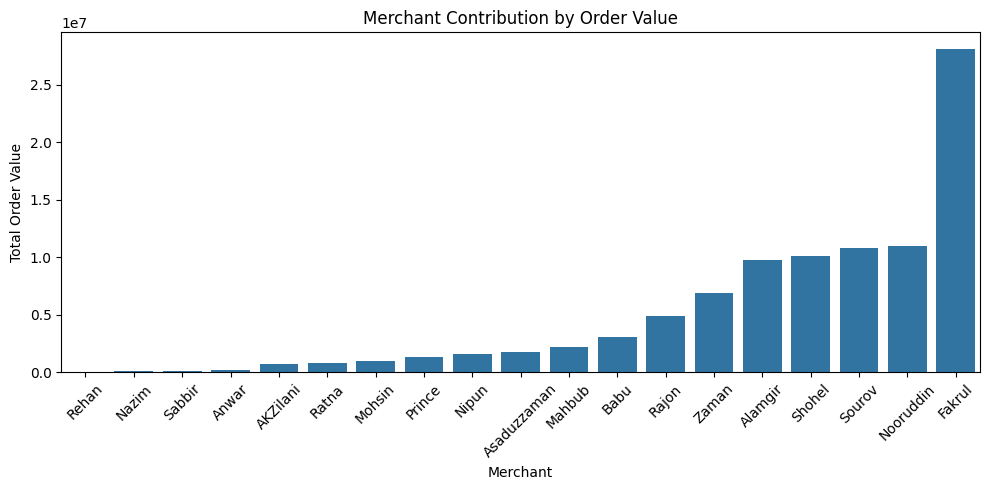

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

merchant_contrib = df.groupby('Merchant')['Value'].sum().reset_index().sort_values(by='Value', ascending=True)

plt.figure(figsize=(10,5))
sns.barplot(data=merchant_contrib, x='Merchant', y='Value')
plt.title('Merchant Contribution by Order Value')
plt.ylabel('Total Order Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 2. Buyer Value Stats (Most, Avg, Least)

In [28]:
buyer_stats = df.groupby('Buyer')['Value'].agg(['sum', 'mean', 'min']).reset_index().sort_values(by='sum', ascending=False)
print(buyer_stats)


                                Buyer          sum          mean      min
8                                 H&M  49160416.53    421.977824     1.72
6                     EL CORTE INGLES  13005019.15   1476.836151    42.00
17                            Primark  12801621.90   1741.717265     4.91
22                        Springfield   7593524.45    699.735021     3.95
12                               NEXT   2650445.64   1240.845337     6.03
0                         Best Seller   2319845.59    814.552525     1.00
9                 HAGGAR CLOTHING CO.   1857617.26   4270.384506     5.29
5                          DK Company   1360019.65    563.855576     6.45
16                      PEPE JEANS SL   1115255.90   2199.715779    10.80
28                                ZXY    497797.95  71113.992857   762.75
25                                TMS    412112.45    473.692471     6.40
15            PEEK AND CLOPPENBURG KG    230906.46    726.120943    83.08
20                       River Island 

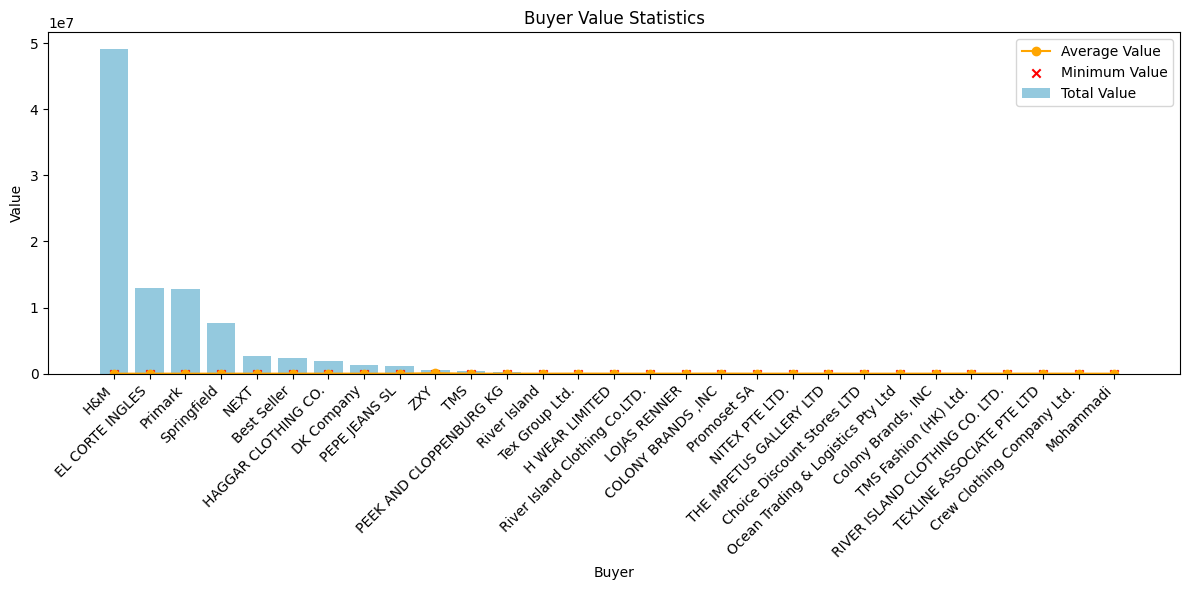

In [29]:
#  drow plot Buyer Value Stats (Most, Avg, Least)

plt.figure(figsize=(12, 6))
sns.barplot(data=buyer_stats, x='Buyer', y='sum', label='Total Value', color='skyblue')
plt.plot(buyer_stats['Buyer'], buyer_stats['mean'], marker='o', linestyle='-', color='orange', label='Average Value')
plt.scatter(buyer_stats['Buyer'], buyer_stats['min'], color='red', label='Minimum Value', marker='x')

plt.title('Buyer Value Statistics')
plt.xlabel('Buyer')
plt.ylabel('Value')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


## 3. Number of Styles per Buyer

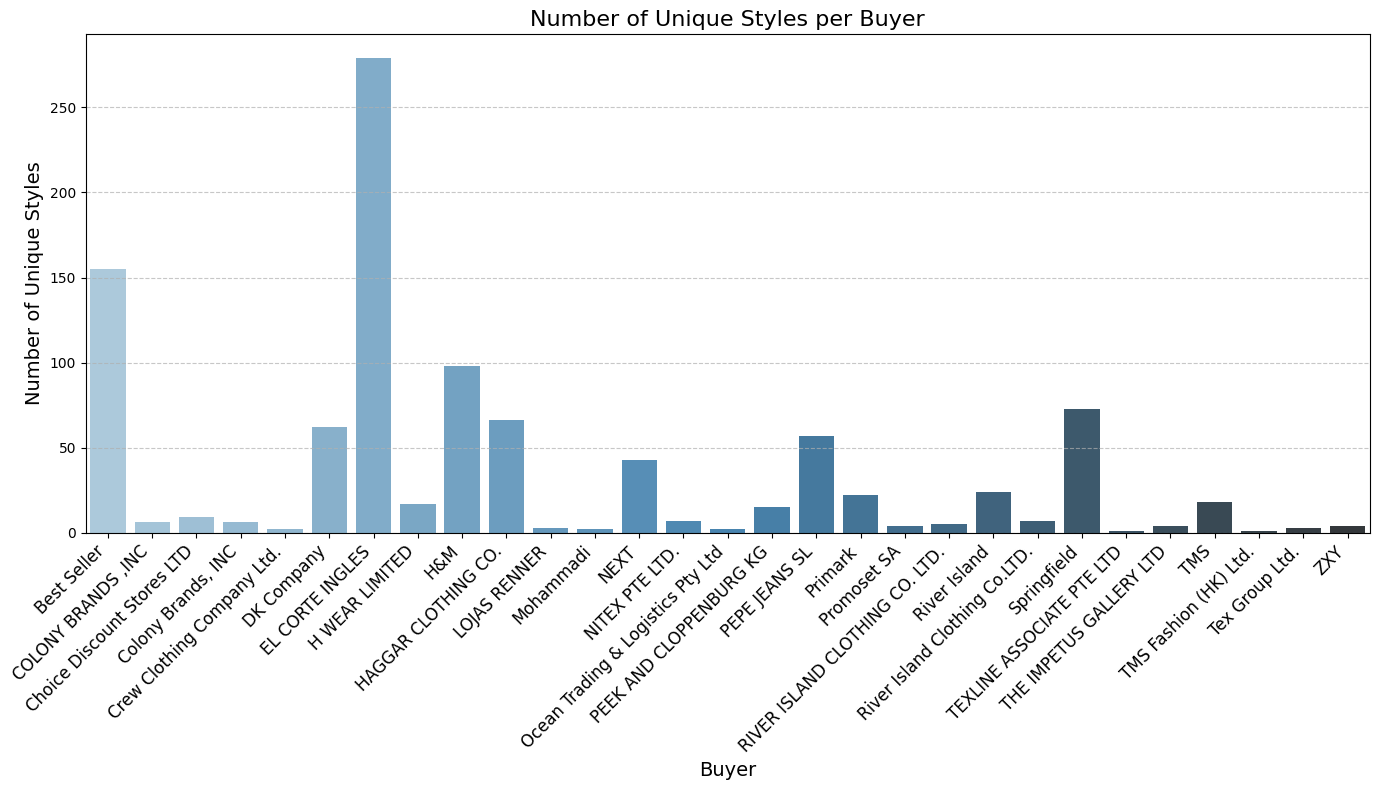

In [36]:
# Create the barplot with improved readability
plt.figure(figsize=(14, 8))  # Increase the figure size for better clarity
sns.barplot(data=styles_per_buyer, x='Buyer', y='Unique Styles', palette='Blues_d')

# Set the title
plt.title('Number of Unique Styles per Buyer', fontsize=16)

# Rotate x-axis labels and adjust the font size for clarity
plt.xticks(rotation=45, ha='right', fontsize=12)

# Adjust y-axis label size and add grid lines for readability
plt.ylabel('Number of Unique Styles', fontsize=14)
plt.xlabel('Buyer', fontsize=14)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)  # Grid lines only on the y-axis

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


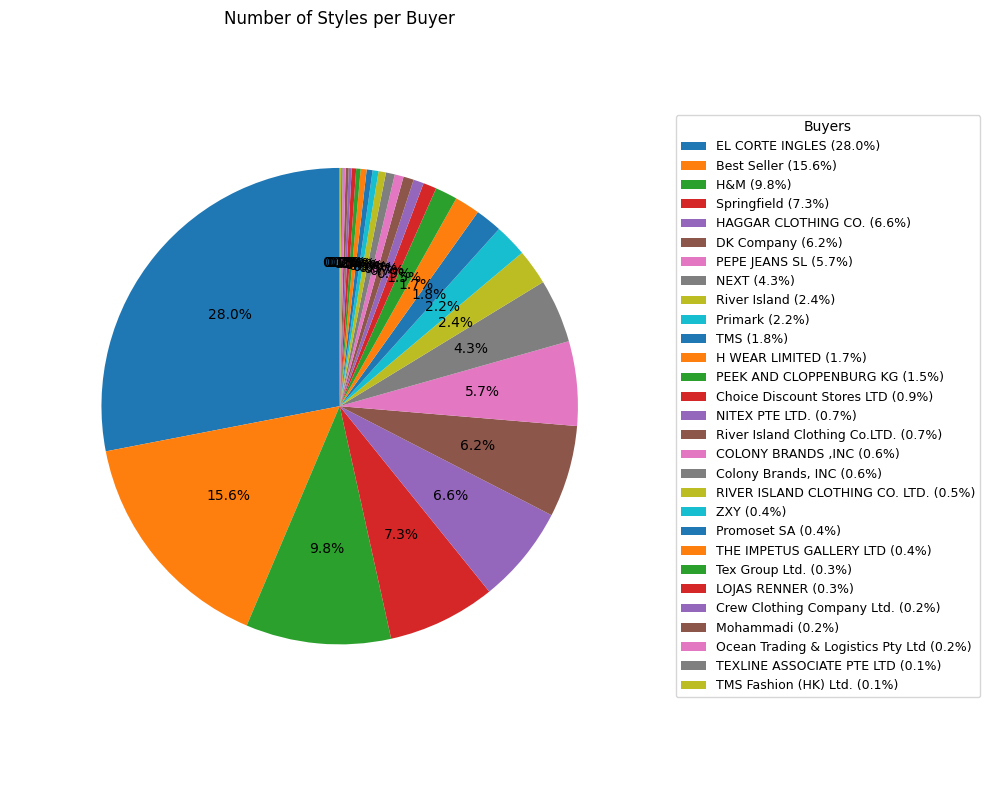

In [33]:
import matplotlib.pyplot as plt

# Sort for consistent appearance
styles_per_buyer_sorted = styles_per_buyer.sort_values('Unique Styles', ascending=False)

# Calculate total and percentage
total = styles_per_buyer_sorted['Unique Styles'].sum()
styles_per_buyer_sorted['Percentage'] = (styles_per_buyer_sorted['Unique Styles'] / total * 100).round(1)

# Create custom labels: "Buyer (XX.X%)"
labels = [f"{buyer} ({pct}%)" for buyer, pct in zip(styles_per_buyer_sorted['Buyer'], styles_per_buyer_sorted['Percentage'])]

# Plot pie chart
plt.figure(figsize=(10, 8))
wedges, _, _ = plt.pie(
    styles_per_buyer_sorted['Unique Styles'],
    startangle=90,
    autopct='%1.1f%%',
    textprops={'fontsize': 10}
)

# Add legend with Buyer (Percentage)
plt.legend(wedges, labels, title="Buyers", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1), fontsize=9)

plt.title('Number of Styles per Buyer')
plt.axis('equal')  # Equal aspect ratio for circle
plt.tight_layout()
plt.show()


## 4. Total Orders per Buyer

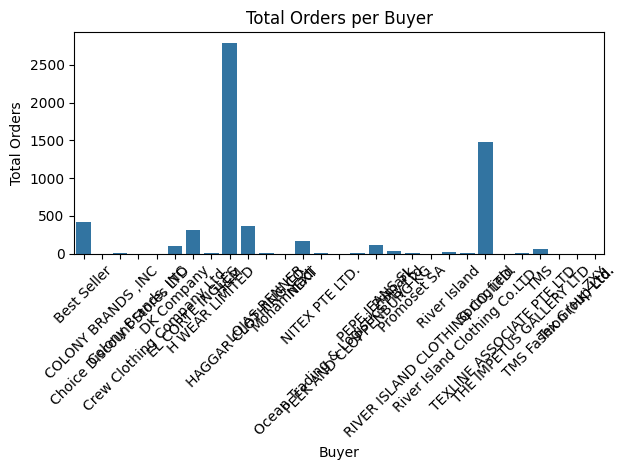

In [37]:
orders_per_buyer = df.groupby('Buyer')['Order No'].nunique().reset_index(name='Total Orders')

sns.barplot(data=orders_per_buyer, x='Buyer', y='Total Orders')
plt.title('Total Orders per Buyer')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 5. Total Styles per Order

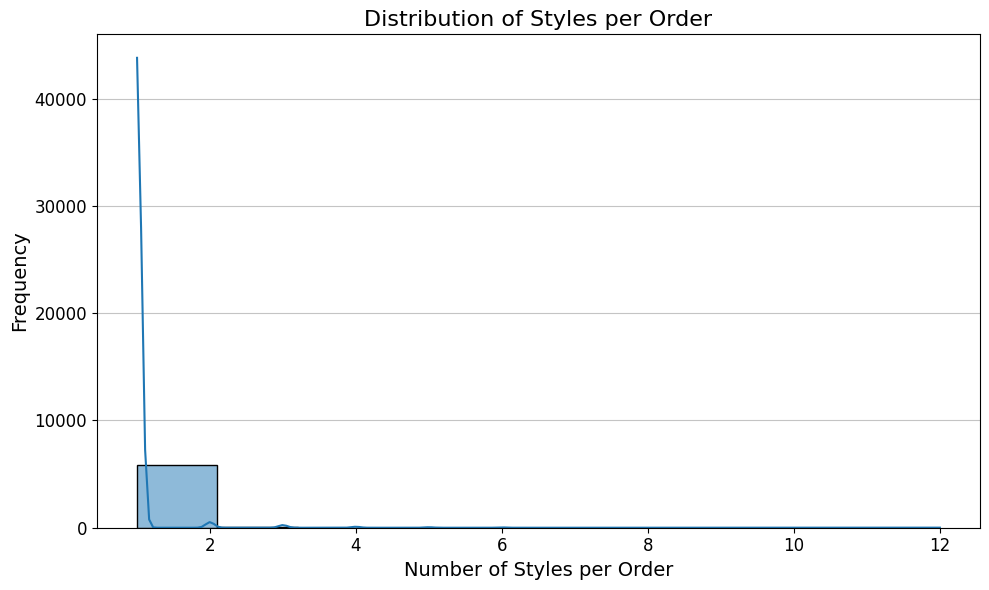

In [40]:
# Calculate the number of styles per order
styles_per_order = df.groupby('Order No')['Style'].nunique().reset_index(name='Number of Styles')

# Create the histogram
plt.figure(figsize=(10, 6))
sns.histplot(styles_per_order['Number of Styles'], bins=10, kde=True)  # Adjust bins as needed
plt.title('Distribution of Styles per Order', fontsize=16)
plt.xlabel('Number of Styles per Order', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()


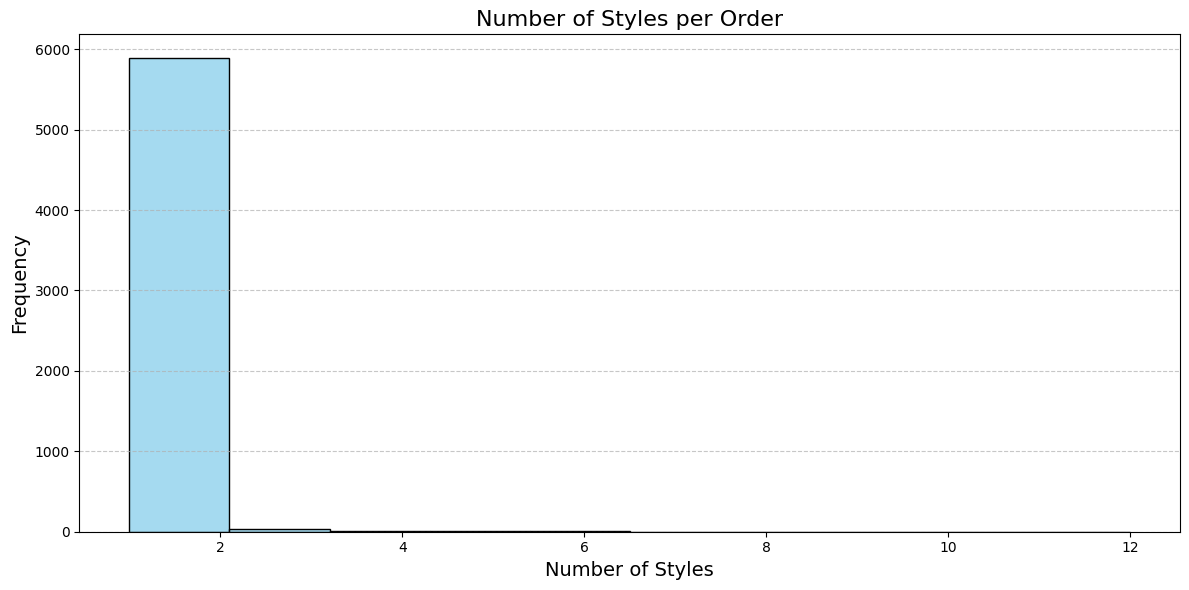

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the histogram with improved readability
plt.figure(figsize=(12, 6))  # Increase figure size for better clarity
sns.histplot(styles_per_order['Styles Per Order'], bins=10, kde=False, color='skyblue')

# Add the title and labels with adjusted font sizes
plt.title('Number of Styles per Order', fontsize=16)
plt.xlabel('Number of Styles', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Add gridlines for better visual clarity
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()


## 6. Quantity and FOB per Style

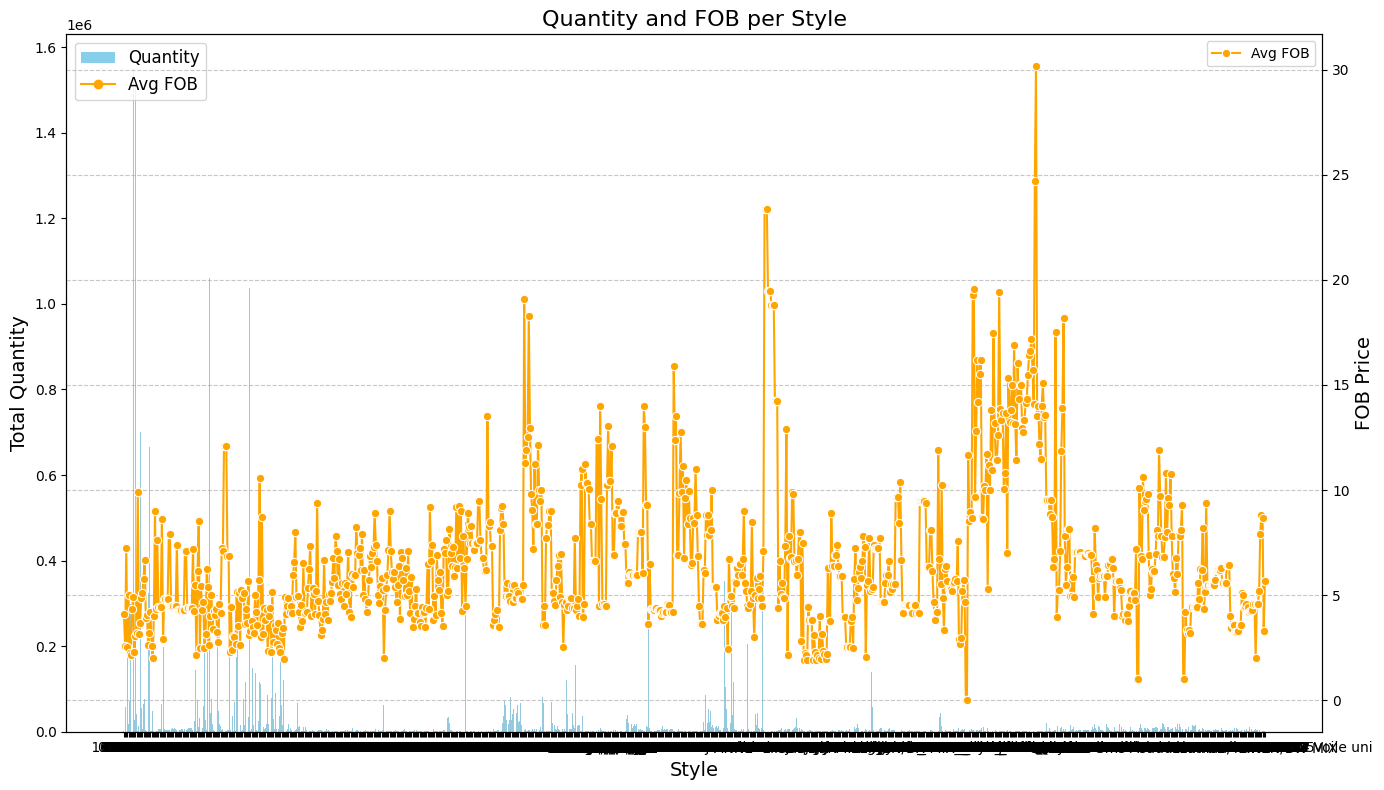

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the figure and axes with larger size for better clarity
fig, ax1 = plt.subplots(figsize=(14, 8))

# Bar plot for Total Quantity
sns.barplot(data=style_summary, x='Style', y='Quantity', ax=ax1, color='skyblue')
ax1.set_ylabel('Total Quantity', fontsize=14)
ax1.set_xlabel('Style', fontsize=14)

# Add a second axis for the line plot of FOB
ax2 = ax1.twinx()
sns.lineplot(data=style_summary, x='Style', y='FOB', ax=ax2, color='orange', marker='o', label='Avg FOB')
ax2.set_ylabel('FOB Price', fontsize=14)

# Set the title and improve the readability of the plot
plt.title('Quantity and FOB per Style', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate x-axis labels for better readability

# Create a custom legend for the barplot and lineplot
bar_legend = ax1.bar(0, 0, color='skyblue', label='Quantity')  # Placeholder for bar legend
line_legend = ax2.plot([], [], color='orange', marker='o', label='Avg FOB')[0]  # Placeholder for line legend
ax1.legend(handles=[bar_legend, line_legend], loc='upper left', fontsize=12)

# Add gridlines to the y-axis for the line plot for clarity
ax2.grid(True, axis='y', linestyle='--', alpha=0.7)

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()


## 7. Value per Buyer and per Style (Plotly)

In [48]:
import plotly.express as px

# Total Order Value per Buyer - Bar Chart
value_by_buyer = df.groupby('Buyer')['Value'].sum().reset_index()

# Create the bar chart for Total Order Value per Buyer
fig1 = px.bar(value_by_buyer,
              x='Buyer',
              y='Value',
              title='Total Order Value per Buyer',
              text='Value',  # Display values on the bars
              labels={'Value': 'Total Order Value'},  # Custom label for y-axis
              color='Value',  # Optional: color by Value for better visual impact
              color_continuous_scale='Blues')  # Optional: color scale

# Update layout for readability
fig1.update_layout(
    xaxis_title="Buyer",
    yaxis_title="Total Order Value",
    xaxis_tickangle=-45,  # Rotate x-axis labels for better readability
    template="plotly_white",  # Clean white background
    margin={"l": 40, "r": 40, "t": 40, "b": 100}  # Adjust margins
)

# Show the bar chart
fig1.show()

# Total Order Value by Style - Pie Chart
value_by_style = df.groupby('Style')['Value'].sum().reset_index()

# Create the pie chart for Total Order Value by Style
fig2 = px.pie(value_by_style,
              names='Style',
              values='Value',
              title='Total Order Value by Style',
              color='Style',  # Color by style for better differentiation
              color_discrete_sequence=px.colors.qualitative.Set3)  # Optional color palette

# Update layout for pie chart
fig2.update_layout(
    title={'x': 0.5},  # Center the title
    template="plotly_white",  # Clean white background
    margin={"l": 40, "r": 40, "t": 40, "b": 40}  # Adjust margins
)

# Show the pie chart
fig2.show()


In [50]:
# 1. How much merchants contribute to managing buyer orders.
merchant_contrib = df.groupby('Merchant')['Value'].sum().reset_index().sort_values(by='Value', ascending=False)
print("Merchant Contribution to Order Value:")
print(merchant_contrib)


# 2. Most valuable, average, and least valuable buyers based on order value or quantity.
buyer_stats = df.groupby('Buyer')['Value'].agg(['sum', 'mean', 'min']).reset_index().sort_values(by='sum', ascending=False)
print("\nBuyer Value Statistics:")
print(buyer_stats)

# 3. Number of styles available per buyer.
styles_per_buyer = df.groupby('Buyer')['Style'].nunique().reset_index(name='Unique Styles')
print("\nNumber of Styles per Buyer:")
print(styles_per_buyer)

# 4. Total number of orders per buyer.
orders_per_buyer = df.groupby('Buyer')['Order No'].nunique().reset_index(name='Total Orders')
print("\nTotal Orders per Buyer:")
print(orders_per_buyer)

# 5. Total number of styles per order.
styles_per_order = df.groupby('Order No')['Style'].nunique().reset_index(name='Number of Styles')
print("\nTotal Styles per Order:")
print(styles_per_order)

# 6. Quantity and FOB amount per style.
style_summary = df.groupby('Style').agg({'Quantity': 'sum', 'FOB': 'mean'}).reset_index()
print("\nQuantity and FOB per Style:")
print(style_summary)

# 7. Total value generated per buyer and per style.
value_per_buyer = df.groupby('Buyer')['Value'].sum().reset_index()
print("\nTotal Value per Buyer:")
print(value_per_buyer)

value_per_style = df.groupby('Style')['Value'].sum().reset_index()
print("\nTotal Value per Style:")
value_per_style


Merchant Contribution to Order Value:
       Merchant        Value
5        Fakrul  28129066.46
10    Nooruddin  10939549.90
17       Sourov  10809736.65
16       Shohel  10070041.05
1       Alamgir   9763442.35
18        Zaman   6854355.45
12        Rajon   4848886.54
4          Babu   3022968.02
6        Mahbub   2192627.34
3   Asaduzzaman   1721808.57
9         Nipun   1552270.79
11       Prince   1327101.09
7        Mohsin    984936.00
13        Ratna    783318.07
0      AKZilani    684901.89
2         Anwar    165758.67
15       Sabbir     91396.02
8         Nazim     78122.50
14        Rehan         0.02

Buyer Value Statistics:
                                Buyer          sum          mean      min
8                                 H&M  49160416.53    421.977824     1.72
6                     EL CORTE INGLES  13005019.15   1476.836151    42.00
17                            Primark  12801621.90   1741.717265     4.91
22                        Springfield   7593524.45    699.735

,Style,Value
0,13235643,4116.40
1,00941,150904.00
2,01765,1597.20
3,0337777,556869.52
4,06378,85069.80
...,...,...
988,WT23-A8964,3942.10
989,WT23-A8965,4408.80
990,WT24- A2794,8675.35
991,WY23-A6658-5,2970.00


## Insights Report: Buyer Purchase Order Summary (20-25)

This report analyzes buyer purchase order data from 2020-2025, providing insights into merchant performance, buyer spending patterns, and product trends.

**1. Merchant Performance:**

* **Merchant Contribution by Order Value:**  The analysis reveals varying levels of contribution from different merchants.  (Visualization: Bar chart of `Merchant Contribution by Order Value`). Key merchants and their relative contributions are easily identifiable from the chart.  This data can be used to identify top-performing merchants and potentially those requiring additional support or attention.

**2. Buyer Spending Behavior:**

* **Buyer Value Statistics:**  The report shows total, average, and minimum order values per buyer. (Visualization: Bar chart with overlayed lines and points for `Buyer Value Statistics`). This allows for a comprehensive understanding of each buyer's spending patterns. High-value buyers can be prioritized, and buyers with low average orders can be targeted with appropriate promotions or strategies.

**3. Product Diversity:**

* **Number of Unique Styles per Buyer:**  Analysis reveals how many unique styles each buyer orders.  (Visualizations: Bar chart and pie chart of `Number of Unique Styles per Buyer`). This highlights buyers' preferences for product diversity. A high number of unique styles per buyer could signify a greater interest in variety, whereas fewer styles could indicate more focused needs. The percentage of total styles contributes per buyer will help prioritize buyers.

* **Total Orders per Buyer:** The number of orders placed by each buyer is visualized as a bar chart. This provides information on order frequency, which, when combined with order value, gives a more holistic view of buyer engagement.


* **Total Styles per Order:**  The distribution of styles per order is displayed in a histogram. This can inform inventory management and order fulfillment strategies. A high frequency of single-style orders could mean smaller, more focused orders, while a higher number of styles per order suggests more diverse orders that potentially involve higher order values.


**4. Product Performance:**

* **Quantity and FOB per Style:** This visualization uses a combined bar and line plot showing the total quantity ordered per style and the average FOB (Freight on Board) price.  This allows for evaluation of product popularity (quantity) alongside its pricing implications.  High-volume products with lower FOB prices may signify higher profitability.


**5. Overall Value Trends:**

* **Value per Buyer and per Style (Plotly):**  Interactive visualizations using Plotly provide a clear overview of total order value by both buyer and style. This interactive format allows easy drill-down into specific buyers and styles, enabling deeper exploration of the data. The bar chart of total value per buyer offers insight into which buyers contribute most significantly to revenue, while the pie chart of value per style provides a distribution across product lines.


**Recommendations:**

* **Targeted Marketing:**  Identify high-value buyers and personalize marketing campaigns to further increase their engagement and spending.
* **Inventory Management:** Optimize stock levels based on the frequency and quantity of styles ordered.
* **Merchant Relationship Management:** Focus on strengthening relationships with top-performing merchants to ensure consistent product quality and availability.
* **Pricing Strategy:** Analyze the FOB price alongside the popularity (quantity) of styles to make strategic adjustments, maximizing profitability.
* **Product Portfolio Optimization:** Evaluate styles with low value or quantity to understand if they should be discontinued or promoted differently.



This report offers a starting point for deeper analysis. Further investigation could explore time series trends, seasonal variations, and correlations between various metrics to create more refined and impactful business strategies.
